In [1]:
import sys
import os
from pathlib import Path
os.environ["WORKDIR"] = "/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes"
# You will have to change the following imports depending on where you have 
# the packages installed
# If using binder please uncomment the followings.
#sys.path.append("/home/jovyan/")
workdir = Path(os.getenv('WORKDIR', '.'))
sys.path.append(str(workdir)+"/src")
sys.path.append("/users/PAS0254/dananjaya/Taweret/")
sys.path.append("/users/PAS0254/dananjaya/.conda/envs/jstaw/")
from configurations import *
from emulator import *
#sys.path.append("/Users/dananjayaliyanage/git/Taweret")
#sys.path.append("/Users/dananjayaliyanage/git/Taweret/subpackages/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np
import bilby

Using idf = 1 : Chapman-Enskog R.T.A
SystemsInfo = 
{'Pb-Pb-2760': {'proj': 'Pb', 'targ': 'Pb', 'sqrts': 2760, 'main_design_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat', 'main_range_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat', 'validation_design_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_validation_PbPb-2760.dat', 'validation_range_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production//design_ranges_validation_PbPb-2760.dat', 'labels': ['$N$[$2.76$TeV]', '$p$', '$\\sigma_k$', '$w$ [fm]', '$d_{\\mathrm{min}}$ [fm]', '$\\tau_R$ [fm/$c$]', '$\\alpha$', '$T_{\\eta,\\mathrm{kink}}$ [GeV]', '$a_{\\eta,\\mathrm{low}}$ [GeV${}^{

In [2]:
obs_to_remove = ['dN_dy_Lambda', 'dN_dy_Omega', 'dN_dy_Xi']

from Taweret.models import jetscape_sims_models as sims

m1 = sims.jetscape_models_pb_pb_2760(fix_MAP=False,model_num=0, obs_to_remove=obs_to_remove)
m2 = sims.jetscape_models_pb_pb_2760(fix_MAP=False,model_num=3, obs_to_remove=obs_to_remove)
exp = sims.exp_data()
g = np.linspace(0, 60, 10)

exp_data= exp.evaluate(g,obs_to_remove=obs_to_remove)

from Taweret.core.base_model import BaseModel

from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'Grad':m1,'PTB':m2}
mix_model = BL(models_dic=models, method='addstepasym', nargs_model_dic={'Grad':17, 'PTB':17}, same_parameters = True)

#uncoment to change the prior from the default
priors = bilby.core.prior.PriorDict()
priors['addstepasym_0'] = bilby.core.prior.Uniform(0, 60, name="addstepasym_0")
priors['addstepasym_1'] = bilby.core.prior.Uniform(0, 60, name="addstepasym_1")
priors['addstepasym_2'] = bilby.core.prior.Uniform(0, 1, name="addstepasym_2")
mix_model.set_prior(priors)

#result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], outdir = 'outdir/samba_bivaraite', label='step_mix')
outdir = 'outdir/calibration_grad_ptb_addstepasym_20000_10_exp'
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], outdir = outdir, label='addstepasym_mix', load_previous=True,)
#kwargs_for_sampler=sampler_args)

#sns.set_context('poster')
#result.plot_corner()
#plt.savefig(outdir+'/figures/'+'corner_', dpi=100)

Loading experimental data from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/HIC_experimental_data
Loading main points from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
Loading main points from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
addstepasym mixing function has 3 free parameter(s)
To change the prior use `set_prior` method
Using default priors for model
{'Grad_0': Uniform(minimum=10.0, maximum=20.

In [3]:
# # If false, do not try to find the MAP value and load it from a saved file.
# find_map_param = True
# cal_name = 'BPE_map'
# from scipy import optimize
# if find_map_param == True:
#     bounds=[(a,b) for (a,b) in zip(design_min,design_max)]
#     print(bounds)
#     x0 = [a+b/2 for a,b in bounds]
#     #rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
#     #                                        bounds=bounds,
#     #                                       maxiter=100000,
#     #                                        tol=1e-9,
#     #                                        disp=True)
#     minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds,"tol":1e-11}
#     rslt=optimize.basinhopping(lambda x: -log_posterior(x)
#                                 ,x0,niter=100,minimizer_kwargs=minimizer_kwargs)
#     map_values = rslt.x
#     np.save(cal_name, map_values)
# else:
#     map_values = np.load(cal_name+'.npy')

In [4]:
#Model parameter names in Latex compatble form
model_param_dsgn = ['$\\theta$', 
                    '$\\gamma$',
                    '$\\beta$',
    '$N$[$2.76$TeV]',
 '$p$',
 '$\\sigma_k$',
 '$w$ [fm]',
 '$d_{\\mathrm{min}}$ [fm]',
 '$\\tau_R$ [fm/$c$]',
 '$\\alpha$',
 '$T_{\\eta,\\mathrm{kink}}$ [GeV]',
 '$a_{\\eta,\\mathrm{low}}$ [GeV${}^{-1}$]',
 '$a_{\\eta,\\mathrm{high}}$ [GeV${}^{-1}$]',
 '$(\\eta/s)_{\\mathrm{kink}}$',
 '$(\\zeta/s)_{\\max}$',
 '$T_{\\zeta,c}$ [GeV]',
 '$w_{\\zeta}$ [GeV]',
 '$\\lambda_{\\zeta}$',
 '$b_{\\pi}$',
 '$T_{\\mathrm{sw}}$ [GeV]']

In [5]:
len(model_param_dsgn)

20

In [6]:
bound_array = []
for param_name in mix_model.prior.keys():
    prior = mix_model.prior[param_name]
    a,b = prior.minimum, prior.maximum
    bound_array.append((a,b))
print(bound_array)

[(0, 60), (0, 60), (0, 1), (10.0, 20.0), (-0.7, 0.7), (0.3, 2.0), (0.5, 1.5), (0.0, 4.913), (0.3, 2.0), (-0.3, 0.3), (0.13, 0.3), (-2.0, 1.0), (-1.0, 2.0), (0.01, 0.2), (0.01, 0.2), (0.12, 0.3), (0.025, 0.15), (-0.8, 0.8), (2.0, 8.0), (0.13, 0.165)]


In [7]:
outdir

'outdir/calibration_grad_ptb_addstepasym_20000_10_exp'

In [8]:
#mix_model.mix_loglikelihood()

In [9]:
# If false, do not try to find the MAP value and load it from a saved file.
find_map_param = False
cal_name = '/map_values'
from scipy import optimize
if find_map_param == True:
    #bounds=[(a,b) for (a,b) in zip(design_min,design_max)]
    bounds= bound_array
    print(bounds)
    #x0 = [a+b/2 for a,b in bounds]
    x0 = mix_model.map
    #rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
    #                                        bounds=bounds,
    #                                       maxiter=100000,
    #                                        tol=1e-9,
    #                                        disp=True)
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds,"tol":1e-11}
    #rslt=optimize.basinhopping(lambda x: -log_posterior(x), x0,niter=100,minimizer_kwargs=minimizer_kwargs)
    rslt=optimize.basinhopping(lambda x: -mix_model.mix_loglikelihood(x[0:3],[x[3:]],
                                                                      x_exp=g, 
                                                                      y_exp=exp_data[0], 
                                                                      y_err=exp_data[1]), 
                               x0,niter=100,minimizer_kwargs=minimizer_kwargs)
    map_values = rslt.x
    np.save(outdir+cal_name, map_values)
else:
    map_values = np.load(outdir+cal_name+'.npy')

In [10]:
map_values

array([ 2.60238739e+01,  3.73884261e+01,  0.00000000e+00,  1.46608552e+01,
        7.68442516e-02,  9.06469199e-01,  9.85224189e-01,  4.30647491e-01,
        1.28329367e+00,  1.37287732e-01,  1.72841587e-01, -1.93687099e+00,
       -5.44204549e-03,  8.70200675e-02,  1.00303728e-01,  1.73465312e-01,
        6.78990260e-02,  8.00000000e-01,  7.78860148e+00,  1.45621096e-01])

In [11]:
mix_model.map

array([25.37795621, 39.07309434,  0.04209319, 15.29627912,  0.05870238,
        0.93305284,  1.06755552,  0.93190134,  1.28548755,  0.12533909,
        0.18968877, -0.33832986, -0.49761111,  0.08633554,  0.06606985,
        0.17230674,  0.09215547,  0.78658993,  7.89042365,  0.14775291])

In [12]:
mix_model.mix_loglikelihood(map_values[0:3], [map_values[3:]], x_exp=g, y_exp=exp_data[0], y_err=exp_data[1])

90.71154056311825

In [13]:
mix_model.mix_loglikelihood(mix_model.map[0:3], [mix_model.map[3:]], x_exp=g, y_exp=exp_data[0], y_err=exp_data[1])

88.26555156175026

In [14]:
#for testing
#map_values = mix_model.map

In [15]:
#observables_to_plot

In [16]:
result.posterior.shape

(90400, 22)

In [17]:
prior_df_temp = pd.DataFrame(mix_model.prior.sample(90000))
prior_df = pd.DataFrame(prior_df_temp.values, columns=model_param_dsgn)

In [18]:
prior_df.head()

,$\theta$,$\gamma$,$\beta$,$N$[$2.76$TeV],$p$,$\sigma_k$,$w$ [fm],$d_{\mathrm{min}}$ [fm],$\tau_R$ [fm/$c$],$\alpha$,"$T_{\eta,\mathrm{kink}}$ [GeV]","$a_{\eta,\mathrm{low}}$ [GeV${}^{-1}$]","$a_{\eta,\mathrm{high}}$ [GeV${}^{-1}$]",$(\eta/s)_{\mathrm{kink}}$,$(\zeta/s)_{\max}$,"$T_{\zeta,c}$ [GeV]",$w_{\zeta}$ [GeV],$\lambda_{\zeta}$,$b_{\pi}$,$T_{\mathrm{sw}}$ [GeV]
0,25.021320,1.090790,0.110370,19.586066,0.276668,1.902212,0.933333,2.694652,0.874296,-0.062934,0.144375,-1.646476,1.377781,0.109424,0.054166,0.199277,0.051543,0.253226,6.478682,0.145320
1,43.219470,17.240409,0.044087,18.820753,0.171776,1.239607,0.925544,2.436212,0.780419,-0.056153,0.224841,-0.025650,1.982311,0.020015,0.159962,0.229972,0.129790,-0.187612,4.004430,0.140991
2,0.006862,24.162423,0.470011,16.685876,-0.536477,1.374758,0.923455,3.107885,1.019425,0.297415,0.257296,-1.723262,-0.686729,0.168756,0.112983,0.256898,0.096227,-0.241181,2.753403,0.148167
3,18.139954,34.296579,0.397433,17.211508,0.144481,1.848867,1.159325,1.650963,1.218299,-0.244636,0.270116,-0.421145,-0.592081,0.199986,0.091971,0.129181,0.046287,0.443729,3.486265,0.164924
4,8.805353,46.243753,0.974214,16.064802,0.077384,0.633719,1.025274,3.197375,1.457348,0.154804,0.226558,-0.256813,1.640891,0.077991,0.137439,0.187572,0.076412,0.392739,4.236880,0.149667


In [19]:
samples_df = pd.DataFrame(result.posterior.values[:,:-2],columns=model_param_dsgn)


In [20]:
samples_df.shape

(90400, 20)

In [21]:
samples_df.head()

,$\theta$,$\gamma$,$\beta$,$N$[$2.76$TeV],$p$,$\sigma_k$,$w$ [fm],$d_{\mathrm{min}}$ [fm],$\tau_R$ [fm/$c$],$\alpha$,"$T_{\eta,\mathrm{kink}}$ [GeV]","$a_{\eta,\mathrm{low}}$ [GeV${}^{-1}$]","$a_{\eta,\mathrm{high}}$ [GeV${}^{-1}$]",$(\eta/s)_{\mathrm{kink}}$,$(\zeta/s)_{\max}$,"$T_{\zeta,c}$ [GeV]",$w_{\zeta}$ [GeV],$\lambda_{\zeta}$,$b_{\pi}$,$T_{\mathrm{sw}}$ [GeV]
0,10.048710,35.800458,0.070016,15.262861,0.064956,0.990876,1.039248,2.836107,1.119415,0.180243,0.266126,-0.202820,0.478912,0.074077,0.052237,0.188309,0.053784,-0.020275,7.540327,0.148798
1,51.953896,36.555637,0.172050,15.255615,0.033739,0.900501,1.047634,1.018223,1.368037,0.100296,0.279943,-0.601862,0.800882,0.046198,0.074901,0.183958,0.145921,0.795992,5.458827,0.149358
2,56.340243,33.566909,0.748106,14.645353,0.042848,1.043403,0.971052,0.440626,1.436826,0.053180,0.217464,-1.891950,0.985077,0.081178,0.104933,0.192015,0.140829,0.518897,3.697790,0.139982
3,59.436501,39.076403,0.161114,15.017490,0.072761,0.830290,1.054788,0.154394,1.284123,0.139611,0.167016,-0.519548,-0.206144,0.098276,0.053515,0.160526,0.028667,-0.138053,6.805407,0.146232
4,59.436501,39.076403,0.161114,15.017490,0.072761,0.830290,1.054788,0.154394,1.284123,0.139611,0.167016,-0.519548,-0.206144,0.098276,0.053515,0.160526,0.028667,-0.138053,6.805407,0.146232


In [22]:
len(mix_model.map.flatten())

20

In [23]:
from plotting import plot_corner_viscosity


In [ ]:
plot_corner_viscosity(samples_df,prior_df, outdir, n_samples=90000, prune=10, MAP=map_values, closure=None)


In [ ]:
from plotting import plot_corner_no_viscosity
plot_corner_no_viscosity(samples_df,prior_df, outdir, n_samples=90000, prune=10, MAP=map_values, closure=None)


In [ ]:
from plotting import plot_bulk, plot_shear

In [ ]:
plot_shear(samples_df, prior_df, outdir, n_samples = 90000, prune=10, MAP=map_values, closure=None, ax= None, legend=False)

In [ ]:
plot_bulk(samples_df, prior_df, outdir, n_samples =90000, prune=10, MAP=map_values, closure=None, ax= None, legend=False)

In [ ]:
# #sns.set_context("notebook", font_scale=1.5)
# sns.set_style("ticks")
# map_parameters=mix_model.map.flatten()
# sns.set_palette('bright')

# observables_to_plot=[i+3 for i in [0, 1, 2 ,3 , 4, 5, 6, 15, 16]]
# observables_to_plot = [0,1,2]+ observables_to_plot

# samples_df = pd.DataFrame(result.posterior.values[:,:-2],columns=model_param_dsgn)

# gg = sns.PairGrid(samples_df.iloc[:,observables_to_plot], corner=True, diag_sharey=False)
# gg.map_lower(sns.histplot, color=sns.color_palette()[4])
# #g.map_upper(sns.kdeplot, shade=True, color=sns.color_palette()[0])
# gg.map_diag(sns.kdeplot, linewidth=2, shade=True, color=sns.color_palette()[9])
# for n,i in enumerate(observables_to_plot):
#     ax=gg.axes[n][n]
#     ax.axvline(x=map_parameters[i], ls='--', c=sns.color_palette()[9])
#     ax.text(0,0.9,s= f'{map_parameters[i]:.3f}', transform=ax.transAxes)

# plt.tight_layout()
# plt.savefig(outdir+'/figures/'+'full_posterior_', dpi=100)
# plt.show()

In [ ]:
# sns.set_context('poster')
# result.plot_corner()

In [24]:
_,mean_w_prior,CI_w_prior, _ = mix_model.predict_weights(g, CI=[5,20,80,95], samples=prior_df.values)
_,mean_w,CI_w, _ = mix_model.predict_weights(g, CI=[5,20,80,95])

using provided samples instead of posterior
(90000, 10)
(90400, 10)


In [25]:
per5_w, per20_w, per80_w, per95_w = CI_w
prior5_w, prior20_w, prior80_w, prior95_w = CI_w_prior

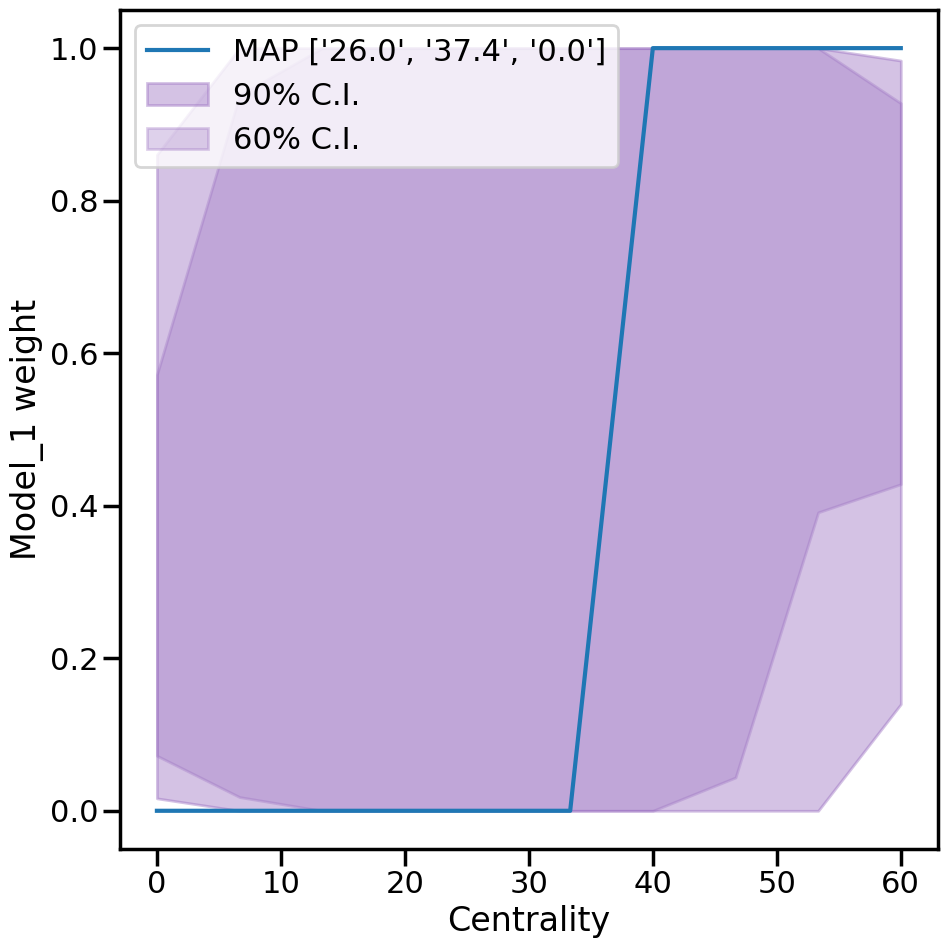

In [26]:
#plt.show()
#map_values= mix_model.map
map_values = map_values
w1,_ = mix_model.evaluate_weights(map_values[0:3],g)
#w1,_ = mix_model.evaluate_weights(np.array([0.2, 0]),g)

fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title('MAP')
ax.plot(g, w1, label = 'MAP ' + str([f'{mp:.1f}' for mp in map_values[0:3]]))

ax.fill_between(g,per5_w.flatten(),per95_w.flatten(),color=sns.color_palette()[4], alpha=0.4, label='90% C.I.')
ax.fill_between(g,per20_w.flatten(),per80_w.flatten(), color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
#ax.fill_between(g,prior20_w.flatten(),prior80_w.flatten(),color=sns.color_palette()[2], alpha=0.5, label='60% C.I. Prior')
    
ax.set_xlabel('Centrality')
ax.set_ylabel('Model_1 weight')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(outdir+'/figures/'+'MAP_mixing_function_model_1', dpi=100)
#plt.show()

In [27]:
result.posterior.shape

(90400, 22)

In [28]:
#kk =result.posterior[::1000]

In [29]:
#kk.shape

In [30]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(g, CI=[5,20,80,95], nthin=10)


(10000, 20)
using provided samples instead of posterior


In [31]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

print(f'Map values {map_values}')

Map values [ 2.60238739e+01  3.73884261e+01  0.00000000e+00  1.46608552e+01
  7.68442516e-02  9.06469199e-01  9.85224189e-01  4.30647491e-01
  1.28329367e+00  1.37287732e-01  1.72841587e-01 -1.93687099e+00
 -5.44204549e-03  8.70200675e-02  1.00303728e-01  1.73465312e-01
  6.78990260e-02  8.00000000e-01  7.78860148e+00  1.45621096e-01]


In [32]:
# _,mean_prior,CI_prior, _ = mix_model.prior_predict(g, CI=[5,20,80,95])
# _,mean,CI, _ = mix_model.predict(g, CI=[5,20,80,95])



map_prediction = mix_model.evaluate(map_values[0:3], g, [map_values[3:]])

/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


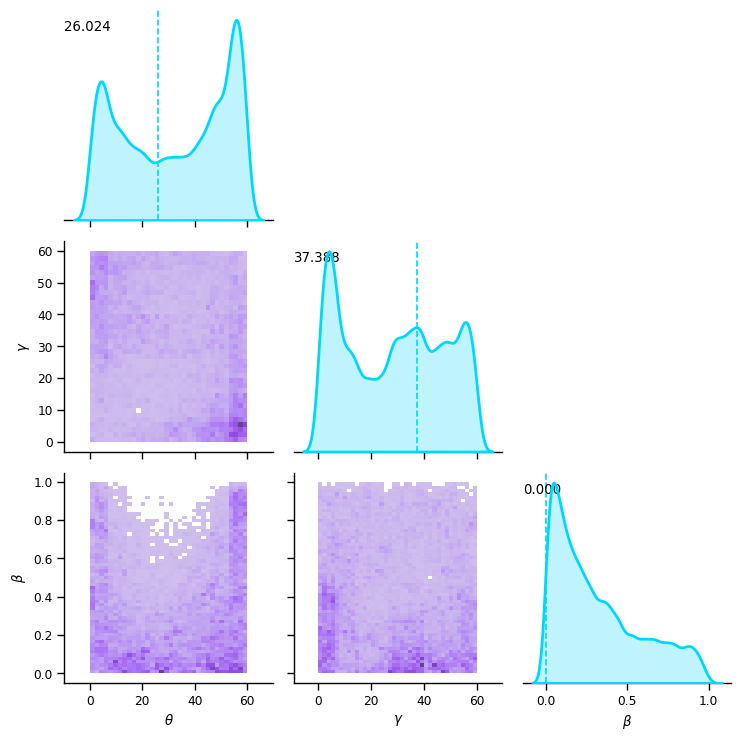

In [33]:
map_parameters=map_values.flatten()
sns.set_context('paper')
sns.set_palette('bright')
observables_to_plot=[0, 1, 2]
gg = sns.PairGrid(samples_df.iloc[:,observables_to_plot], corner=True, diag_sharey=False)
gg.map_lower(sns.histplot, color=sns.color_palette()[4])
#g.map_upper(sns.kdeplot, shade=True, color=sns.color_palette()[0])
gg.map_diag(sns.kdeplot, linewidth=2, shade=True, color=sns.color_palette()[9])
for n,i in enumerate(observables_to_plot):
    ax=gg.axes[n][n]
    ax.axvline(x=map_parameters[i], ls='--', c=sns.color_palette()[9])
    ax.text(0,0.9,s= f'{map_parameters[i]:.3f}', transform=ax.transAxes)

plt.tight_layout()
plt.savefig(outdir+'/figures/'+'posterior_mix', dpi=100)

In [34]:
#g = np.linspace(0, 60, 20)
#plot_g = np.linspace(0.0,60,100)
map_mix = map_values[3:]
m1_prediction = m1.evaluate(g, map_mix)
m2_prediction = m2.evaluate(g, map_mix)
#true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,obs_to_remove=obs_to_remove)

In [35]:
obs_names = list(obs_cent_list['Pb-Pb-2760'].keys())
for i in obs_to_remove:
     obs_names.remove(i)
print(obs_names)

['dNch_deta', 'dET_deta', 'dN_dy_pion', 'dN_dy_kaon', 'dN_dy_proton', 'mean_pT_pion', 'mean_pT_kaon', 'mean_pT_proton', 'pT_fluct', 'v22', 'v32', 'v42']


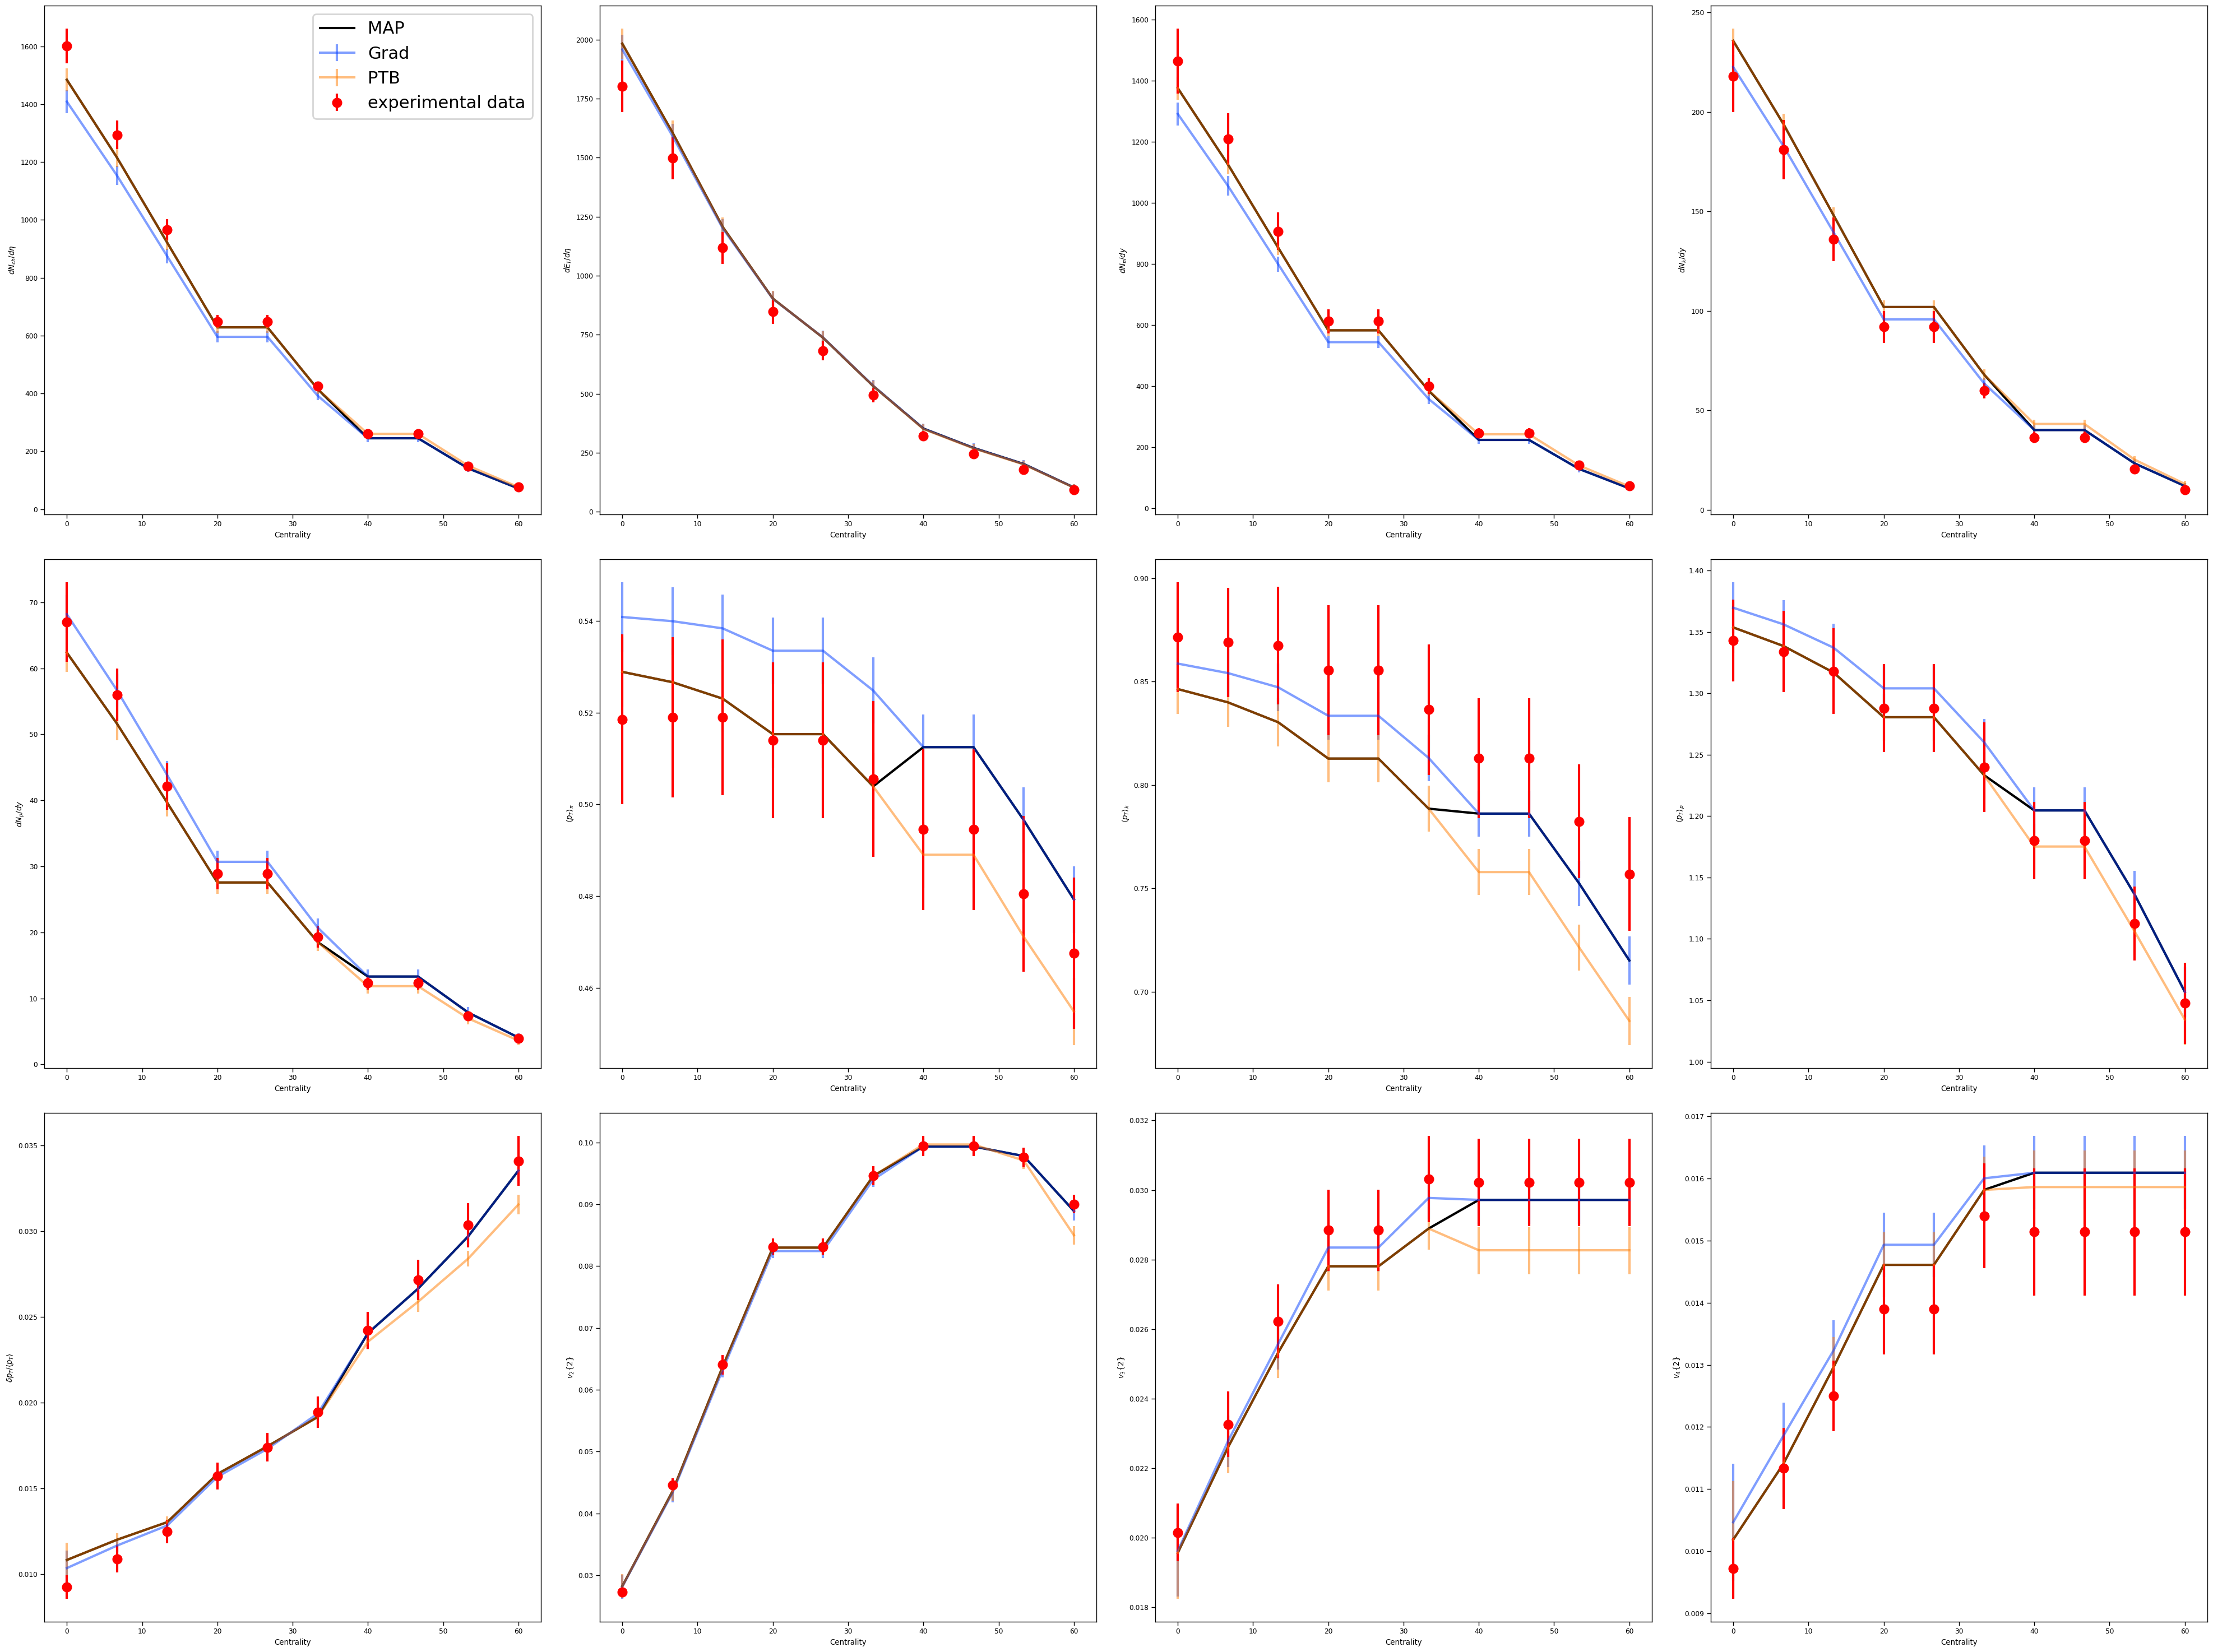

In [36]:
obs_tex_labels = {
                    'dNch_deta' : r'$dN_{ch}/d\eta$',
                    'dN_dy_pion' : r'$dN_{\pi}/dy$',
                    'dN_dy_kaon' : r'$dN_{k}/dy$',
                    'dN_dy_proton' : r'$dN_{p}/dy$',
                    'dN_dy_Lambda' : r'$dN_{\Lambda}/dy$',
                    'dN_dy_Omega' : r'$dN_{\Omega}/dy$',
                    'dN_dy_Xi' : r'$dN_{\Xi}/dy$',
                    'dET_deta' : r'$dE_{T}/d\eta$',
                    'mean_pT_pion' : r'$\langle p_T \rangle _{\pi}$',
                    'mean_pT_kaon' : r'$\langle p_T \rangle _{k}$',
                    'mean_pT_proton' : r'$\langle p_T \rangle _{p}$',
                    'pT_fluct' : r'$\delta p_T / \langle p_T \rangle$',
                    'v22' : r'$v_2\{2\}$',
                    'v32' : r'$v_3\{2\}$',
                    'v42' : r'$v_4\{2\}$',
}





fig, axs = plt.subplots(3,4, figsize=(40,30))
sns.set_context('poster')
for i in range(0,12):
    ax_f= axs.flatten()[i]
    ax_f.errorbar(g, m1_prediction[0][:,i].flatten(), 
                yerr=m1_prediction[1][:,i].flatten(), 
                label='Grad', alpha=0.5)
    ax_f.errorbar(g, m2_prediction[0][:,i].flatten(), 
                yerr=m1_prediction[1][:,i].flatten(),
                label='PTB', alpha=0.5)
    # ax_f.plot(plot_g, m1_prediction[0][:,i].flatten(),
    #             label='Grad', alpha=0.8)
    # ax_f.plot(plot_g, m2_prediction[0][:,i].flatten(), 
    #             label='PTB', alpha=0.8)
    #ax_f.plot(g, mean[0][i,:].flatten(), label='Mean BMM')
    ax_f.plot(g, map_prediction[i,:].flatten(), label='MAP', color='k')
    #ax_f.plot(plot_g, true_output[0], label='truth')
    ax_f.errorbar(g, exp_data[0][:,i].flatten(), 
                yerr=exp_data[1][:,i].flatten(),
                #marker='x',
                fmt='o',
                label='experimental data',
                color='r')
    #ax_f.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data', color='r')
    ax_f.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax_f.set_ylabel(obs_tex_labels[obs_names[i]])
    if i ==0:
        ax_f.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'MAP_', dpi=100)

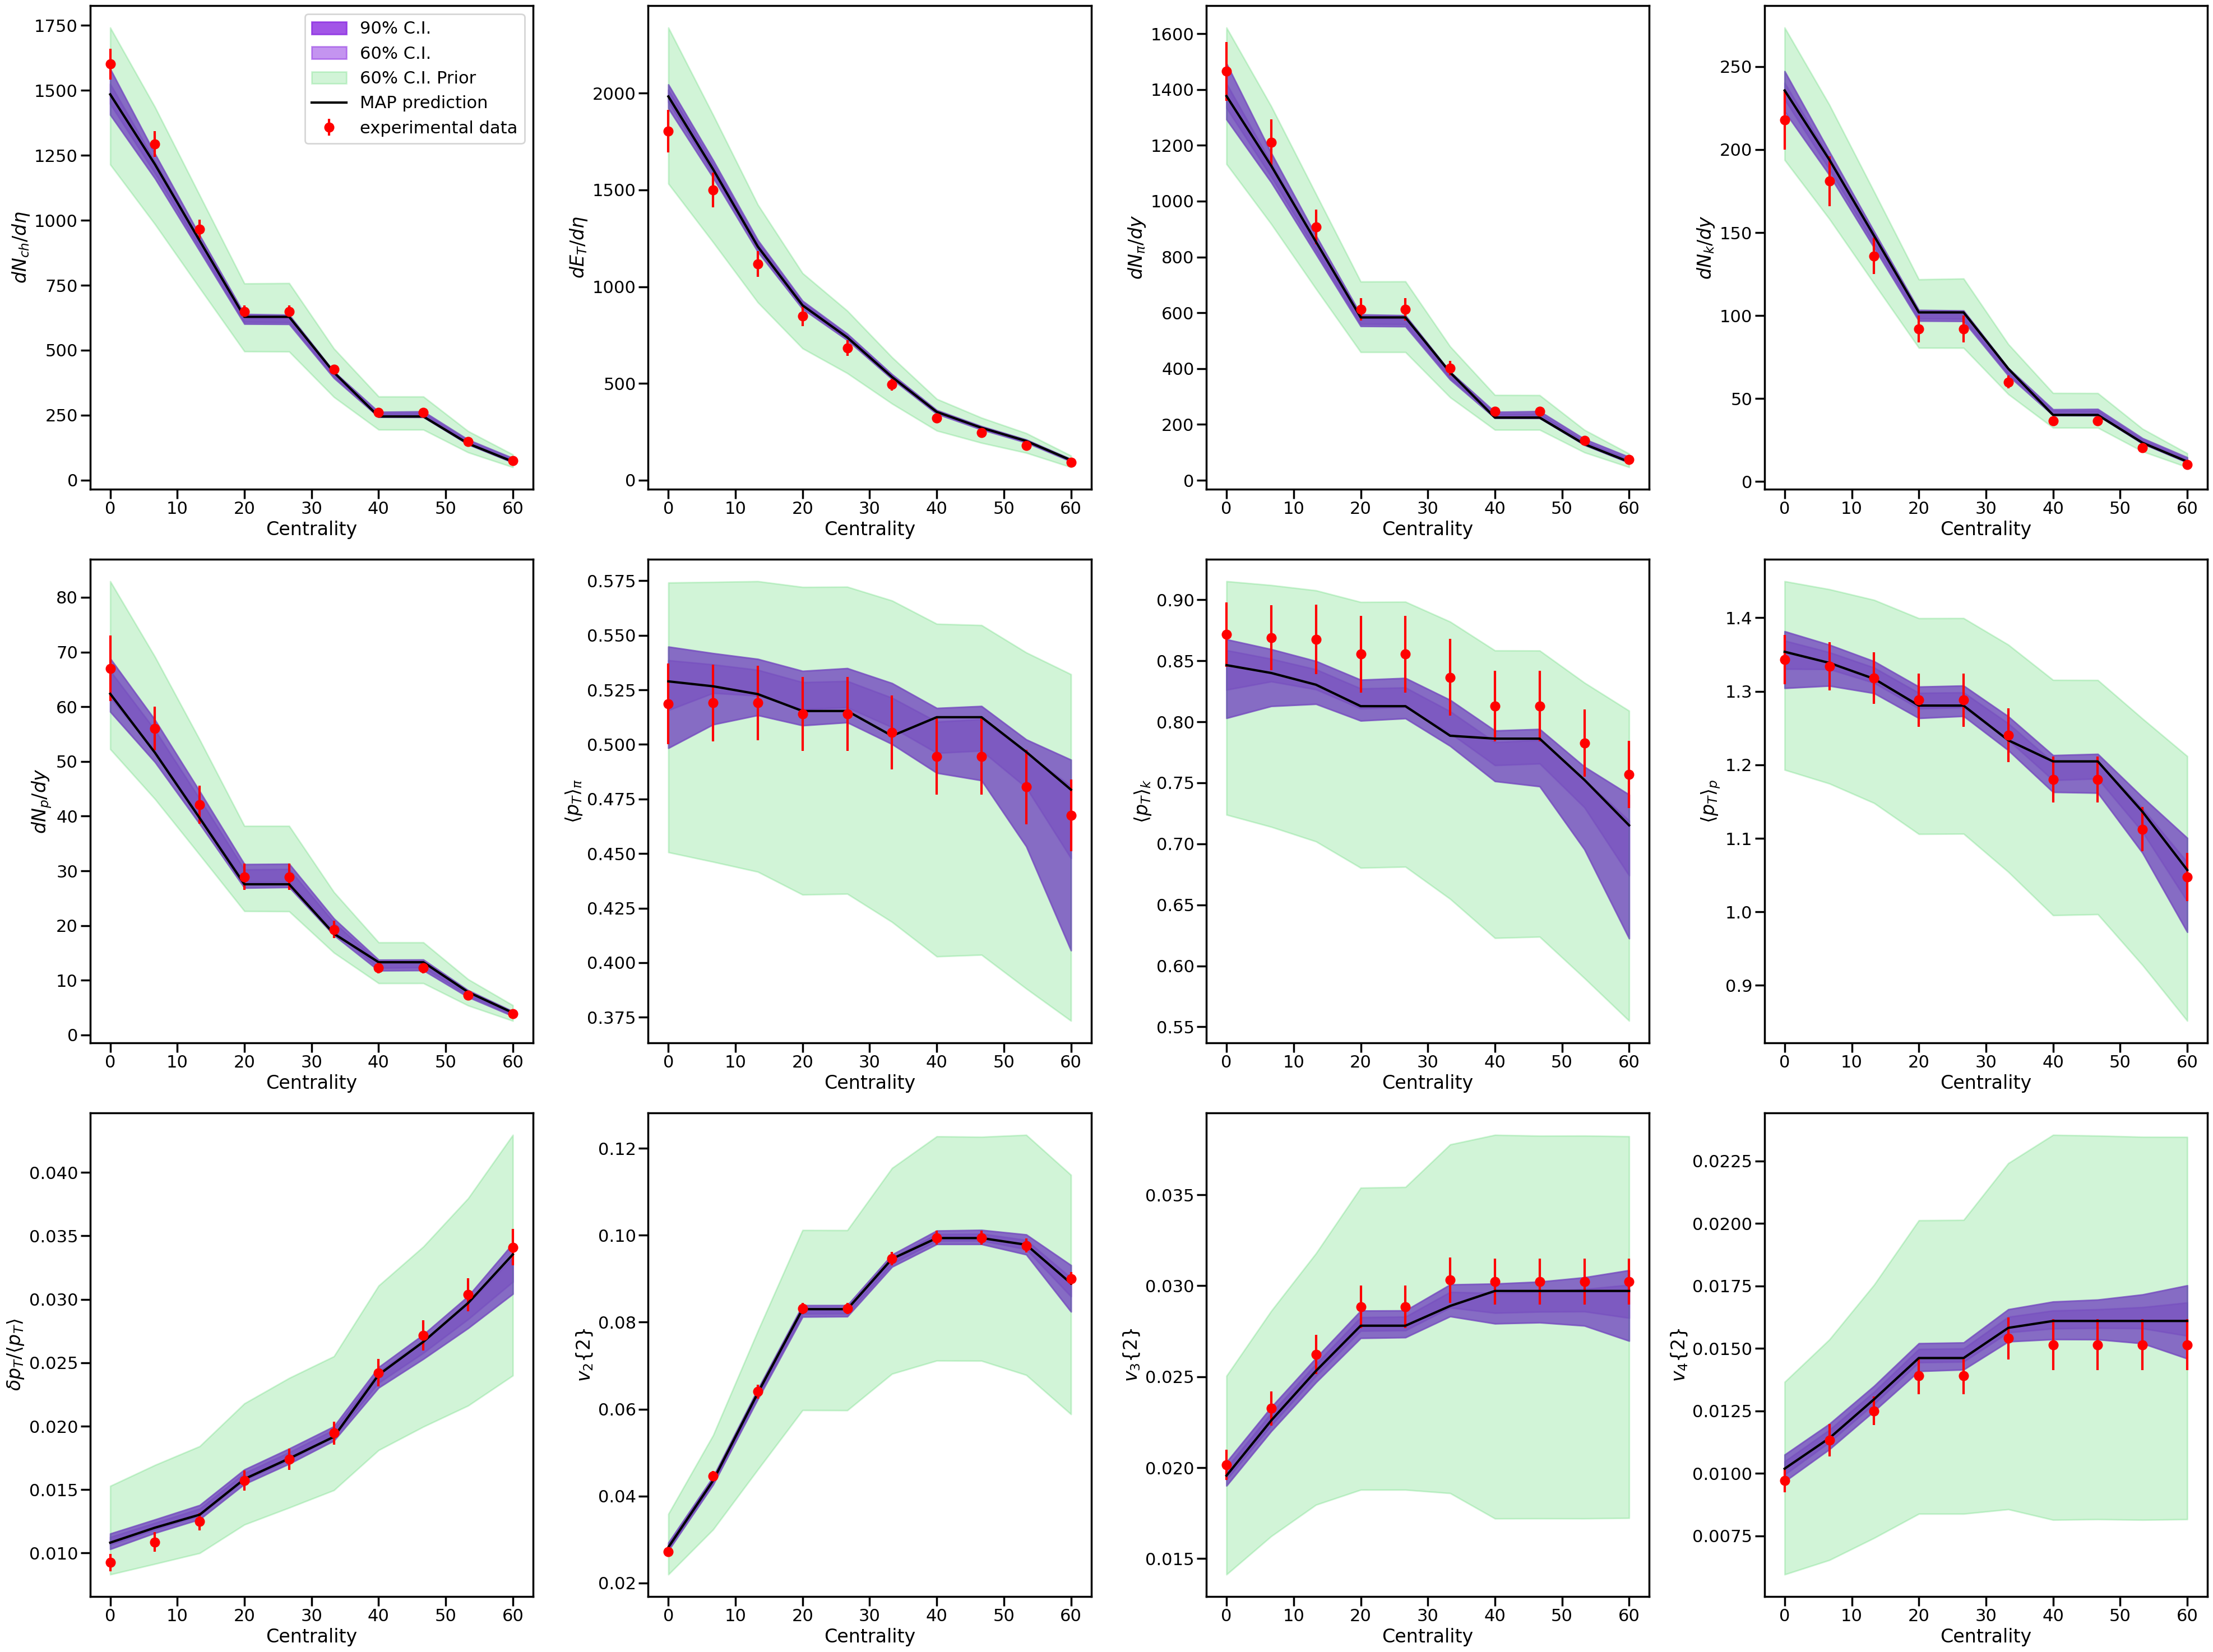

In [37]:


sns.set_context('poster')
fig, axs = plt.subplots(3, 4, figsize=(40,30))
for i in range(0,12):
    ax = axs.flatten()[i]
    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.plot(plot_g, mean[0][i,:].flatten(), label='posterior mean')
    # ax_f.errorbar(plot_g, m1_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(), 
    #             label='Grad', alpha=0.2)
    # ax_f.errorbar(plot_g, m2_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(),
    #             label='PTB', alpha=0.2)
#     ax.plot(g, m1_prediction[0][:,i].flatten(),
#                 label='Grad', alpha=0.8)
#     ax.plot(g, m2_prediction[0][:,i].flatten(), 
#                 label='PTB', alpha=0.8)
    ax.fill_between(g,per5[0][i,:].flatten(),per95[0][i,:].flatten(),color=sns.color_palette()[4], alpha=0.8, label='90% C.I.')
    ax.fill_between(g,per20[0][i,:].flatten(),per80[0][i,:].flatten(), color=sns.color_palette()[4], alpha=0.5, label='60% C.I.')
    ax.fill_between(g,prior20[0][i,:].flatten(),prior80[0][i,:].flatten(),color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
#    ax.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data')
    ax.errorbar(g, exp_data[0][:,i].flatten(), 
                yerr=exp_data[1][:,i].flatten(),
                #marker='x',
                fmt='o',
                label='experimental data',
                color='r')
    #ax.plot(plot_g, mean_prior[0][i,:].flatten(), label='prior mean')
    ax.plot(g, map_prediction[i,:].flatten(), label='MAP prediction', color='k')
    ax.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax.set_ylabel(obs_tex_labels[obs_names[i]])
    if i==0:
        ax.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'posterior_predict_', dpi=100)